
## Preparing Amazon dataset

In [1]:
# Dataframe
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
import os

In [2]:
# IMPORT MOBILE PHONE REVIEWS DATA IN PANDAS

base_dir = 'C:/Users/bhanu/73 strings/comments'

#Get all files in the directory

review_df = []#pd.read_json('C:/Users/bhanu/73 strings/B07HGGYWL6.json')
for file in os.listdir(base_dir):
    json_path = os.path.join(base_dir, file)
    json_data = pd.read_json(json_path)
    review_df.append(json_data)
product_reviews = pd.concat(review_df, ignore_index=True)

In [3]:
# CHECK DATA IN PANDAS

print ("Total data:", str(product_reviews.shape))
product_reviews.head()

Total data: (43693, 5)


,body,product_id,rating,review_date,title
0,hanging this phone always,B07DJCJBB3,1,Reviewed in India on 17 October 2020,Not good phone. Don't buy
1,Heating issue and battery life decreased in ju...,B07DJCJBB3,3,Reviewed in India on 17 October 2020,not as good as expected
2,Facing lot of problems. Battery is getting dra...,B07DJCJBB3,3,Reviewed in India on 17 October 2020,Samsung should take care of the above malfunct...
3,like,B07DJCJBB3,5,Reviewed in India on 17 October 2020,Good
4,Samsung Galaxy M31s phone is HangingCamera qua...,B07DJCJBB3,3,Reviewed in India on 17 October 2020,Don't over expectation


In [4]:
product_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43693 entries, 0 to 43692
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   body         43693 non-null  object
 1   product_id   43693 non-null  object
 2   rating       43693 non-null  int64 
 3   review_date  43693 non-null  object
 4   title        43693 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


## Data Wrangling

In [5]:
product_reviews.title.unique()

array(["Not good phone. Don't buy", 'not as good as expected',
       'Samsung should take care of the above malfunctioning issues seriously.',
       ..., 'Go ..Get it', 'Network issue 🤫 !!!', 'GOOD DEVICE.'],
      dtype=object)

In [16]:
product_reviews.to_csv('C:/Users/bhanu/73 strings/product_reviews.csv', sep=',', encoding='utf-8', index = False)

In [6]:
# Classify ratings as good

good_rate = len(product_reviews[product_reviews['rating'] >= 3])
bad_rate = len(product_reviews[product_reviews['rating'] < 3])

# Printing rates and their total numbers
print ('Good ratings : {} reviews'.format(good_rate))
print ('Bad ratings : {} reviews'.format(bad_rate))


Good ratings : 35767 reviews
Bad ratings : 7926 reviews


In [7]:
# Apply the new classification to the ratings column
product_reviews['rating_class'] = product_reviews['rating'].apply(lambda x: 'bad' if x < 3 else'good')
product_reviews.head()

,body,product_id,rating,review_date,title,rating_class
0,hanging this phone always,B07DJCJBB3,1,Reviewed in India on 17 October 2020,Not good phone. Don't buy,bad
1,Heating issue and battery life decreased in ju...,B07DJCJBB3,3,Reviewed in India on 17 October 2020,not as good as expected,good
2,Facing lot of problems. Battery is getting dra...,B07DJCJBB3,3,Reviewed in India on 17 October 2020,Samsung should take care of the above malfunct...,good
3,like,B07DJCJBB3,5,Reviewed in India on 17 October 2020,Good,good
4,Samsung Galaxy M31s phone is HangingCamera qua...,B07DJCJBB3,3,Reviewed in India on 17 October 2020,Don't over expectation,good


In [8]:
# Convert time object to datetime
product_reviews['review_date'] = product_reviews.review_date.str.replace('Reviewed in India on ', "")

product_reviews['review_date'] = pd.to_datetime(product_reviews['review_date'], format = '%d %B %Y')

product_reviews.head()

,body,product_id,rating,review_date,title,rating_class
0,hanging this phone always,B07DJCJBB3,1,2020-10-17,Not good phone. Don't buy,bad
1,Heating issue and battery life decreased in ju...,B07DJCJBB3,3,2020-10-17,not as good as expected,good
2,Facing lot of problems. Battery is getting dra...,B07DJCJBB3,3,2020-10-17,Samsung should take care of the above malfunct...,good
3,like,B07DJCJBB3,5,2020-10-17,Good,good
4,Samsung Galaxy M31s phone is HangingCamera qua...,B07DJCJBB3,3,2020-10-17,Don't over expectation,good


In [18]:
# Convert product_id to mobile phone names
product_reviews['product_id'] = product_reviews.product_id.str.replace('B07DJCJBB3', "Samsung Galaxy M31s")
product_reviews['product_id'] = product_reviews.product_id.str.replace('B07HGGYWL6', "Samsung Galaxy M31")
product_reviews['product_id'] = product_reviews.product_id.str.replace('B07HGJJ559', "Samsung Galaxy M21")
product_reviews['product_id'] = product_reviews.product_id.str.replace('B07SDPJ4XJ', "OPPO A5")
product_reviews['product_id'] = product_reviews.product_id.str.replace('B07WPVLKPW', "Redmi 8A Sea Blue 3GB")
product_reviews['product_id'] = product_reviews.product_id.str.replace('B07X1KT6LD', "Redmi Note 8")
product_reviews['product_id'] = product_reviews.product_id.str.replace('B07X3P1N3H', "Redmi 8A Sky White")
product_reviews['product_id'] = product_reviews.product_id.str.replace('B07X4R63DF', "Redmi 8A Sea Blue 2GB")
product_reviews['product_id'] = product_reviews.product_id.str.replace('B07YYNX5X6', "Nokia 105")
product_reviews['product_id'] = product_reviews.product_id.str.replace('B086KCCMCP', "Samsung Galaxy M01")

In [22]:
# Concatenate title and body
product_reviews['review_text'] = product_reviews[['title', 'body']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)

In [25]:
product_reviews.head()

,body,product_id,rating,review_date,title,rating_class,review_text
0,hanging this phone always,Samsung Galaxy M31s,1,2020-10-17,Not good phone. Don't buy,bad,Not good phone. Don't buy hanging this phone a...
1,Heating issue and battery life decreased in ju...,Samsung Galaxy M31s,3,2020-10-17,not as good as expected,good,not as good as expected Heating issue and batt...
2,Facing lot of problems. Battery is getting dra...,Samsung Galaxy M31s,3,2020-10-17,Samsung should take care of the above malfunct...,good,Samsung should take care of the above malfunct...
3,like,Samsung Galaxy M31s,5,2020-10-17,Good,good,Good like
4,Samsung Galaxy M31s phone is HangingCamera qua...,Samsung Galaxy M31s,3,2020-10-17,Don't over expectation,good,Don't over expectation Samsung Galaxy M31s pho...


In [26]:
# DESCRIPTIVE STATISTICS

print ("================================================")

### Total reviews
total = len(product_reviews)
print ("Number of reviews: ",total)
print ()

### How many unique products?
print ("Number of unique products: ", len(product_reviews.product_id.unique()))
product_prop = float(len(product_reviews.product_id.unique())/total)
print ("Prop of unique products: ",round(product_prop,3))
print ()

### Average star score
print ("Average rating score: ",round(product_reviews.rating.mean(),3))


print ("================================================")

Number of reviews:  43693

Number of unique products:  10
Prop of unique products:  0.0

Average rating score:  3.904


In [27]:
# Read statistic summary of numeric variables
product_reviews[['rating']].describe()

,rating
count,43693.000000
mean,3.903715
std,1.411313
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


Text(0, 0.5, 'Number of Reviews')

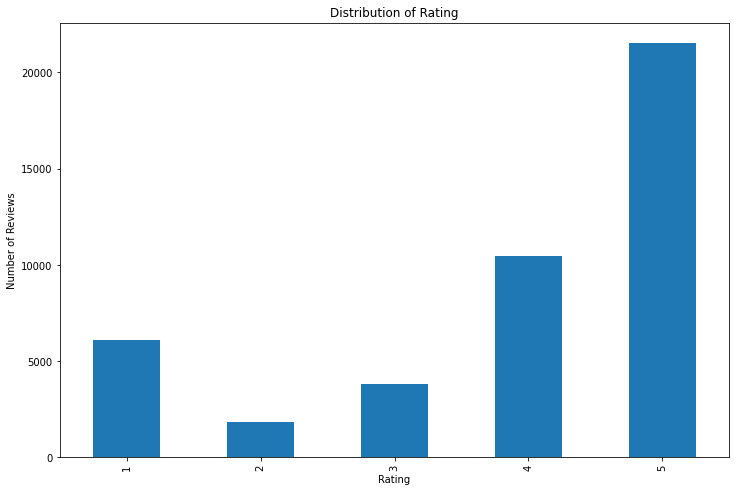

In [28]:
# PLOT DISTRIBUTION OF RATING 

plt.figure(figsize=(12,8))
product_reviews['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

In [29]:
# DISTRIBUTION OF RATING SCORE

class_counts = product_reviews.groupby('rating').size()
class_counts

rating
1     6084
2     1842
3     3789
4    10460
5    21518
dtype: int64

In [30]:
# Customer totals for each rating class
product_reviews['rating_class'].value_counts()

good    35767
bad      7926
Name: rating_class, dtype: int64

In [31]:
# Statistics of non-numeric variables
      
# Number of unique products
print('\nNumber of unique products : {}'.format(len(product_reviews['product_id'].unique())))     

# Review number per unique product 
print('\nReview per product: {}'.format((len(product_reviews)/len(product_reviews['product_id'].unique()))))



Number of unique products : 10

Review per product: 4369.3


## Text Preprocessing¶
The following text preprocessing are implemented to convert raw reviews to cleaned review, so that it will be easier for us to do feature extraction in the next step.




In [32]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import unicodedata
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import json

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhanu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhanu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bhanu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
# calculate raw tokens in order to measure of cleaned tokens

from nltk.tokenize import word_tokenize
raw_tokens=len([w for t in (product_reviews['review_text'].apply(word_tokenize)) for w in t])
print('Number of raw tokens: {}'.format(raw_tokens))


Number of raw tokens: 866487


## Functions for Preprocessing¶


### Removing Special Characters¶
One important task in text normalization involves removing unnecessary and special characters. These may be special symbols or even punctuation that occurs in sentences. This step is often performed before or after tokenization. The main reason for doing so is because often punctuation or special characters do not have much significance when we analyze the text and utilize it for extracting features or information based on NLP and ML.



### Tokenizing Text¶
Tokenization can be defined as the process of breaking down or splitting textual data into smaller meaningful components called tokens.

Sentence tokenization is the process of splitting a text corpus into sentences that act as the first level of tokens which the corpus is comprised of. This is also known as sentence segmentation , because we try to segment the text into meaningful sentences.

Word tokenization is the process of splitting or segmenting sentences into their constituent words. A sentence is a collection of words, and with tokenization we essentially split a sentence into a list of words that can be used to reconstruct the sentence.



### Removing Stopwords¶
Stopwords are words that have little or no significance. They are usually removed from text during processing so as to retain words having maximum significance and context. Stopwords are usually words that end up occurring the most if you aggregated any corpus of text based on singular tokens and checked their frequencies. Words like a, the , me , and so on are stopwords.



### Correcting Words¶
One of the main challenges faced in text normalization is the presence of incorrect words in the text. The definition of incorrect here covers words that have spelling mistakes as well as words with several letters repeated that do not contribute much to its overall significance.



#### Correcting Repeating Characters

#### Correcting Spellings

### Lemmatization¶
The process of lemmatization is to remove word affixes to get to a base form of the word. The base form is also known as the root word, or the lemma, will always be present in the dictionary.



In [34]:
import re, string, unicodedata
import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer

In [45]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

# Function to remove emoji.
def emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# special_characters removal
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

stopword_list= stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')


def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas


In [46]:
def normalize_and_lemmaize(input):
    sample = denoise_text(input)
    sample = emoji(sample)
    sample = remove_special_characters(sample)
    words = nltk.word_tokenize(sample)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)


In [47]:
product_reviews['clean_text'] = product_reviews['review_text'].map(lambda text: normalize_and_lemmaize(text))

In [48]:
product_reviews

,body,product_id,rating,review_date,title,rating_class,review_text,clean_text
0,hanging this phone always,Samsung Galaxy M31s,1,2020-10-17,Not good phone. Don't buy,bad,Not good phone. Don't buy hanging this phone a...,not good phone dont buy hang phone always
1,Heating issue and battery life decreased in ju...,Samsung Galaxy M31s,3,2020-10-17,not as good as expected,good,not as good as expected Heating issue and batt...,not good expect heat issue battery life decrea...
2,Facing lot of problems. Battery is getting dra...,Samsung Galaxy M31s,3,2020-10-17,Samsung should take care of the above malfunct...,good,Samsung should take care of the above malfunct...,samsung take care malfunction issue seriously ...
3,like,Samsung Galaxy M31s,5,2020-10-17,Good,good,Good like,good like
4,Samsung Galaxy M31s phone is HangingCamera qua...,Samsung Galaxy M31s,3,2020-10-17,Don't over expectation,good,Don't over expectation Samsung Galaxy M31s pho...,dont expectation samsung galaxy ms phone hangi...
...,...,...,...,...,...,...,...,...
43688,Gud compact phone,Samsung Galaxy M01,5,2020-06-08,Gud phone,good,Gud phone Gud compact phone,gud phone gud compact phone
43689,Network issue 🤫 !!!,Samsung Galaxy M01,3,2020-06-04,Network issue 🤫 !!!,good,Network issue 🤫 !!! Network issue 🤫 !!!,network issue network issue
43690,Excellent,Samsung Galaxy M01,5,2020-06-02,Excellent!!!,good,Excellent!!! Excellent,excellent excellent
43691,No fingerprint,Samsung Galaxy M01,3,2020-06-02,No fingerprint,good,No fingerprint No fingerprint,no fingerprint no fingerprint


In [49]:
product_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43693 entries, 0 to 43692
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   body          43693 non-null  object        
 1   product_id    43693 non-null  object        
 2   rating        43693 non-null  int64         
 3   review_date   43693 non-null  datetime64[ns]
 4   title         43693 non-null  object        
 5   rating_class  43693 non-null  object        
 6   review_text   43693 non-null  object        
 7   clean_text    43693 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 2.7+ MB


## Cleaning the Text¶


In [50]:
# Let's put aside number of raw tokens in order to measure of cleaned tokens
from nltk.tokenize import word_tokenize
clean_tokens=len([w for t in (product_reviews["clean_text"].apply(word_tokenize)) for w in t])
print('Number of clean tokens: {}\n'.format(clean_tokens))
print('Percentage of removed tokens: {0:.2f}'.format(1-(clean_tokens/raw_tokens)))


Number of clean tokens: 499018

Percentage of removed tokens: 0.42


In [51]:
product_reviews

,body,product_id,rating,review_date,title,rating_class,review_text,clean_text
0,hanging this phone always,Samsung Galaxy M31s,1,2020-10-17,Not good phone. Don't buy,bad,Not good phone. Don't buy hanging this phone a...,not good phone dont buy hang phone always
1,Heating issue and battery life decreased in ju...,Samsung Galaxy M31s,3,2020-10-17,not as good as expected,good,not as good as expected Heating issue and batt...,not good expect heat issue battery life decrea...
2,Facing lot of problems. Battery is getting dra...,Samsung Galaxy M31s,3,2020-10-17,Samsung should take care of the above malfunct...,good,Samsung should take care of the above malfunct...,samsung take care malfunction issue seriously ...
3,like,Samsung Galaxy M31s,5,2020-10-17,Good,good,Good like,good like
4,Samsung Galaxy M31s phone is HangingCamera qua...,Samsung Galaxy M31s,3,2020-10-17,Don't over expectation,good,Don't over expectation Samsung Galaxy M31s pho...,dont expectation samsung galaxy ms phone hangi...
...,...,...,...,...,...,...,...,...
43688,Gud compact phone,Samsung Galaxy M01,5,2020-06-08,Gud phone,good,Gud phone Gud compact phone,gud phone gud compact phone
43689,Network issue 🤫 !!!,Samsung Galaxy M01,3,2020-06-04,Network issue 🤫 !!!,good,Network issue 🤫 !!! Network issue 🤫 !!!,network issue network issue
43690,Excellent,Samsung Galaxy M01,5,2020-06-02,Excellent!!!,good,Excellent!!! Excellent,excellent excellent
43691,No fingerprint,Samsung Galaxy M01,3,2020-06-02,No fingerprint,good,No fingerprint No fingerprint,no fingerprint no fingerprint


In [52]:
product_reviews.to_csv('clean_review.csv', sep=',', encoding='utf-8', index = False)


In [53]:
product_reviews.to_json('clean_review.json')
